# Exercise 7

# Part 1 - DT

## Capital Bikeshare data

#### Angie Paola Chacon Pinzon: 201012536
#### Jahir Stevens Rodriguez Riveros: 201819361
#### Juan Andres Cabal Jaramillo: 200620778
#### David Tavera Sánchez: 201016123

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import mean_squared_error

In [3]:
# read the data and set "datetime" as the index
bikes = pd.read_csv('../P2ModelosAvanzados1/datasets//bikeshare.csv', index_col='datetime', parse_dates=True)
# bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [4]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [5]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [6]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [7]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [8]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

El alquiler promedio de bicicletas es mayor en días laborales.

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

El alquiler promedio de bicicletas es mayor después de la jornada laboral, aproximadamente entre las 4 de la tarde y las 7 de la noche.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

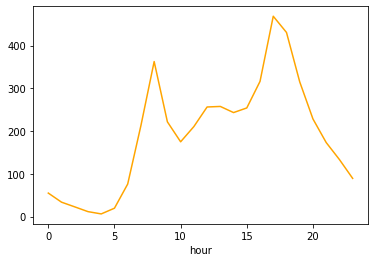

In [10]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot(color='orange')

Plot for workingday == 0 and workingday == 1

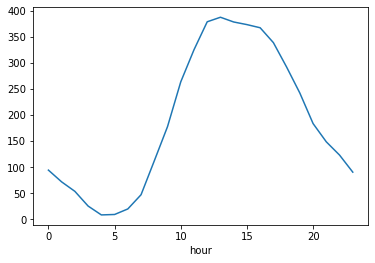

In [11]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

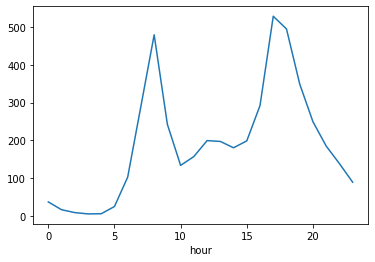

In [12]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

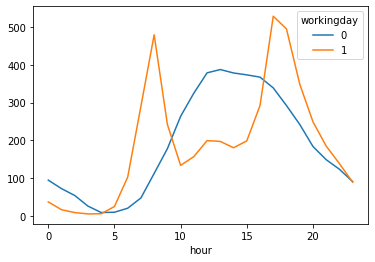

In [13]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

Write about your findings

La estacionalidad de la gráfica naranja del alquiler de bicicletas en días laborales, corresponde a la hora pico de desplazamiento en una jornada de trabajo habitual, la cual ocurre al principio del día y al final de la tarde cuando las personas se desplazan de la casa al trabajo y viceversa. Asímismo, también se puede observar que la demanda aumenta y baja muy rápidamente.    
Mientras que en la gráfica azul, que corresponde al alquiler de bicicletas en días no laborales, la mayor demanda se presenta a las 11 de la mañana y no es un pico tan pronunciado en los días laborales. 
En conclusión, el comportamiento del alquiler de bicicletas refleja los hábitos de movilidad de las personas en días laborales versus días de descanso. 


# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

bikes_lr=bikes[['hour','workingday','total']]
bikes_lr.head()

regr = linear_model.LinearRegression()
regr.fit(bikes_lr[['hour','workingday']],bikes_lr[['total']])

print('intercept:', regr.intercept_)
print('slope:', regr.coef_)

intercept: [67.70595026]
slope: [[10.49206282  4.07248627]]


**Beta 1 (10.4)**: por cada hora adicional que transcurre del día, se puede esperar que las rentas aumenten en promedio en 10 unidades manteniendo todo lo demás constante. 

**Beta 2 (4.07)**: los dias laborales se alquilan cuatro bicicletas más respecto a los días no laborales, manteniendo todo lo demás constante.

La limitación más importante de la regresión lineal es que no se puede modelar correctamente los picos estacionales que ocurren durante el día, ya que con la regresión se esperaría que la variable *y* aumentará o disminuyera respecto a *x*.

# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

## Cálculo del árbol de regresión de forma manual

Antes de iniciar la partición de la base, se calcula la media del total del alquiler de bicicletas para toda la base

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(bikes[['hour','workingday','total']], random_state=1)

# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.total.mean()
train

,hour,workingday,total,prediction
datetime,,,,
2012-10-06 00:00:00,0,0,191,189.812714
2012-05-02 21:00:00,21,1,239,189.812714
2012-12-02 09:00:00,9,0,172,189.812714
2011-07-17 05:00:00,5,0,12,189.812714
2012-01-09 17:00:00,17,1,152,189.812714
...,...,...,...,...
2011-07-09 13:00:00,13,0,416,189.812714
2012-06-05 22:00:00,22,1,193,189.812714
2011-03-02 04:00:00,4,1,1,189.812714


Se define una función que calcula el RMSE para cada partición de la base de acuerdo a las variables de horas y workingday

In [16]:
# define a function that calculates the RMSE for a given split of hour and working day
def hours_split(train, hour):
    lower_hour_total = train[train.hour < hour].total.mean()
    higher_hour_total = train[train.hour >= hour].total.mean()
    train['prediction'] = np.where(train.hour < hour, lower_hour_total, higher_hour_total)
    return np.sqrt(mean_squared_error(train.total, train.prediction))

def work_split(train, work):
    lower_work_total = train[train.workingday < work].total.mean()
    higher_work_total = train[train.workingday >= work].total.mean()
    train['prediction'] = np.where(train.workingday < work, lower_work_total, higher_work_total)
    return np.sqrt(mean_squared_error(train.total, train.prediction))

Se calcula el RMSE para todas las posibles particiones en horas y días laborales, tanto para el lado derecho como izquierdo de la base dividida. Finalmente, se grafica el comportamiento del RMSE respecto a las particiones en las diferentes variables 

Text(0, 0.5, 'RMSE (lower is better)')

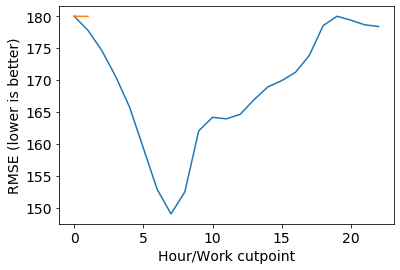

In [17]:
# check all possible hour splits
hour_range = range(train.hour.min(), train.hour.max(), 1)
RMSE_hour = [hours_split(train, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

En este caso se observa que la variable más importante es horas. De esta forma la primera división de la base se realiza en 7 horas

In [18]:
# Variable más importante hours (lado izquierdo hour < 7, lado derecho hour >= 7)
train_izq = train.loc[train.hour<7].copy()
train_izq.hour.unique()

array([0, 5, 6, 4, 1, 3, 2], dtype=int64)

**Evaluación Evaluación del RMSE para las particiones de la base izquierda (horas < 7)** Una vez se hace la primera división, se ejecuta nuevamente la función para evaluar cuál partición de la base se debe hacer para que disminuya el RMSE.

Text(0, 0.5, 'RMSE (lower is better)')

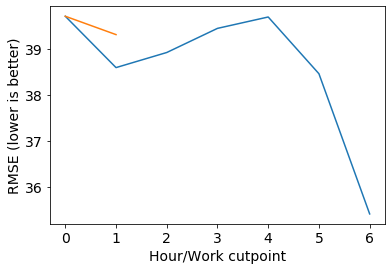

In [19]:
# check all possible hour splits
hour_range = range(train_izq.hour.min(), train_izq.hour.max()+1, 1)
RMSE_hour = [hours_split(train_izq, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_izq, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

En este caso, se observa que la base de la izquierda se debe dividir en 6 horas.

**Evaluación del RMSE para las particiones de la base derecha (horas >=7)**

In [20]:
train_der = train.loc[train.hour >= 7].copy()
train_der.hour.unique()

array([21,  9, 17, 19, 23, 20, 11, 18, 12, 22, 13,  7, 10, 14, 15,  8, 16],
      dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

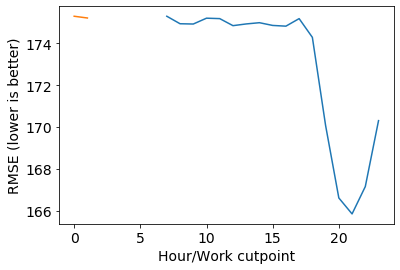

In [21]:
# check all possible hour splits
hour_range = range(train_der.hour.min(), train_der.hour.max()+1, 1)
RMSE_hour = [hours_split(train_der, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_der, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

In [22]:
train_izq_izq = train_izq.loc[train_izq.hour < 6].copy()
train_izq_izq.hour.unique()

array([0, 5, 4, 1, 3, 2], dtype=int64)

**Evaluación del RMSE para las particiones de la base izquierda izquierda (horas < 6)**

Text(0, 0.5, 'RMSE (lower is better)')

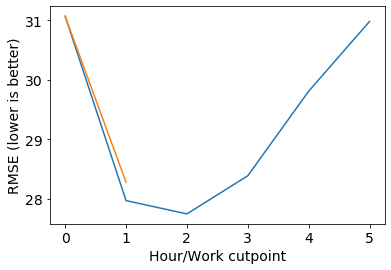

In [23]:
# check all possible hour splits
hour_range = range(train_izq_izq.hour.min(), train_izq_izq.hour.max()+1, 1)
RMSE_hour = [hours_split(train_izq_izq, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_izq_izq, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

**Evaluación del RMSE para las particiones de la base derecha derecha (horas >=21)**

In [24]:
train_der_der = train_der.loc[train_der.hour >= 21].copy()
train_der_der.hour.unique()

array([21, 23, 22], dtype=int64)

Text(0, 0.5, 'RMSE (lower is better)')

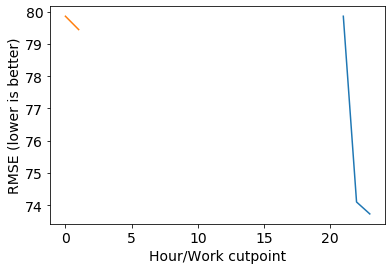

In [25]:
# check all possible hour splits
hour_range = range(train_der_der.hour.min(), train_der_der.hour.max()+1, 1)
RMSE_hour = [hours_split(train_der_der, hour) for hour in hour_range]

# check all possible workingday splits
work_range = [0, 1]
RMSE_work = [work_split(train_der_der, work) for work in work_range]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(hour_range, RMSE_hour)
plt.plot(work_range, RMSE_work)
plt.xlabel('Hour/Work cutpoint')
plt.ylabel('RMSE (lower is better)')

Luego de realizar las particiones correspondientes, se obtiene el siguiente árbol

**Nivel** 

Partición por horas


**Nivel 1**

Lado izquierdo (horas <7)

Lado derecho (horas >=7)


**Nivel 2**

Lado izquierdo_izquierdo (horas <6)

Lado izquierdo_derecho (horas =6) **Hoja 1**

Lado derecho_izquierdo (7>= horas >=20) **Hoja 2**

Lado derecho_derecho (horas >=21)


**Nivel 3**

Lado izquierdo_izquierdo_izquierdo (horas <2) **Hoja 3**

Lado izquierdo_izquierdo_derecho (2>=horas>=5) **Hoja 4**

Lado derecho_izquierdo_izquierdo (21>= horas >23) **Hoja 5**

Lado derecho_izquierdo_derecho (horas =23) **Hoja 6**





# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [26]:
X = train[['hour','workingday']]
y = train['total']

from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [27]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.82111064812962

In [28]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

148.95449405306698

In [29]:
# list of values to try
max_depth_range = range(1, 15)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

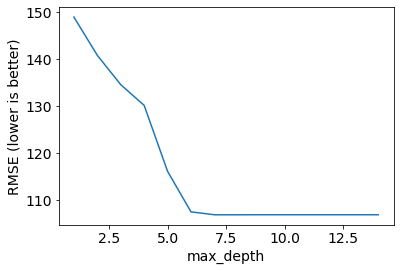

In [30]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

La máximo profundidad que debe tener el árbol es 7, mayores valores a este no tienen un efecto sobre el RMSE

In [31]:
# max_depth=7 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [32]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
feature_cols = ['hours', 'workingday']
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,hours,0.817027
1,workingday,0.182973


La variable más importante es horas en el modelo, ya que es la que más aporta en la reducción de error.

#### desempeño del modelo del árbol de regresión

In [33]:
#train.shape
test.shape

(2722, 3)

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
y_hat=treereg .predict(test[['hour','workingday']])
#y_hat[:4]

print("rmse:", mean_squared_error(y_hat,test[['total']])**0.05)


rmse: 1.5959910584883792


Al probar el modelo con la base test, se observa que el RMSE entre el valor predicho y la base de test es de 1,59 unidades para el total de bicicletas alquiladas.

#### diagrama del árbol

In [36]:
!{sys.executable} -m pip install graphviz

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


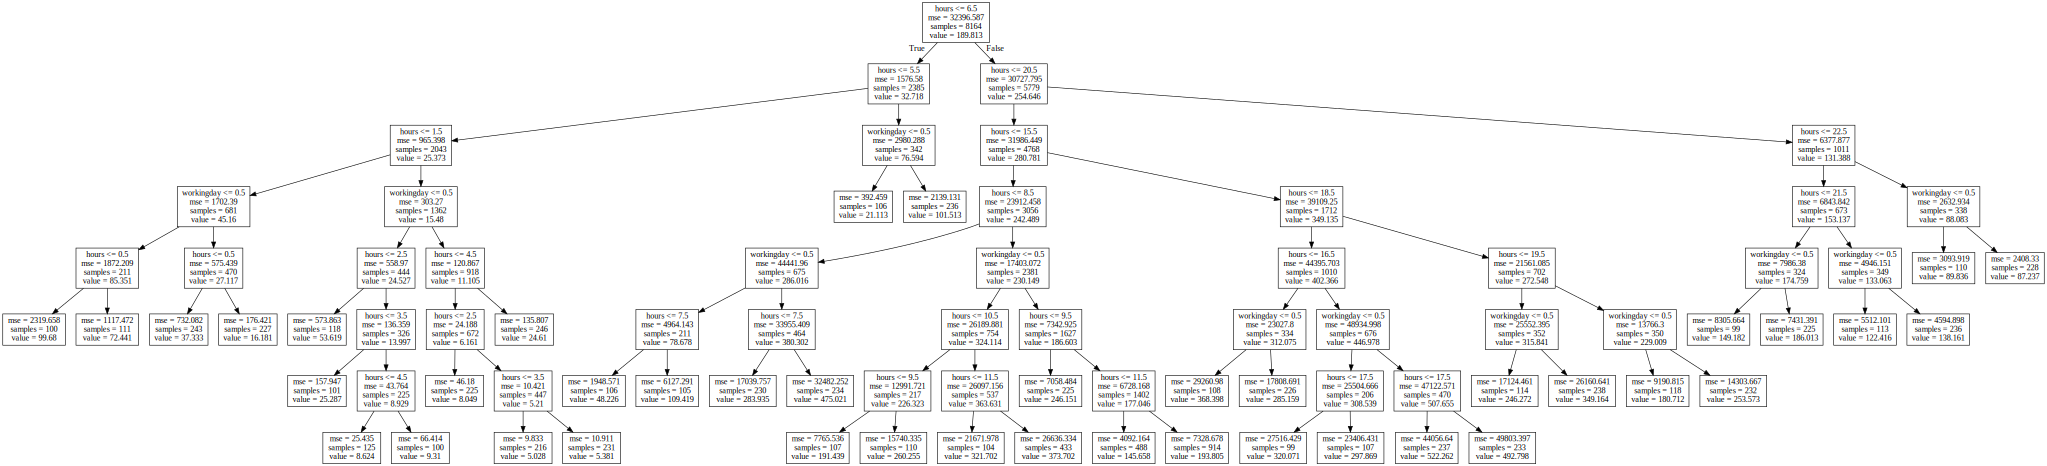

In [37]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

# create a Graphviz file
from sklearn.tree import export_graphviz
import graphviz
g_tree = export_graphviz(treereg, out_file=None, feature_names=feature_cols)

graph = graphviz.Source(g_tree) 

# Show graph
graph

# Part 2 - Bagging

## Mashable news stories analysis

Predicting if a news story is going to be popular

In [38]:
df = pd.read_csv('../P2ModelosAvanzados1/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [39]:
df.shape

(6000, 61)

In [40]:
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']

In [41]:
# La base de datos se encuentra balanceada
y.mean()

0.5

In [42]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 7.6

Estimate a Decision Tree Classifier and a Logistic Regression

Evaluate using the following metrics:
* Accuracy
* F1-Score

Decision Tree Classifier

In [43]:
# list of values to try for max_depth
max_depth_range = range(1, 21)

# list to store the average RMSE for each value of max_depth
accuracy_scores = []

# use 10-fold cross-validation with each value of max_depth
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

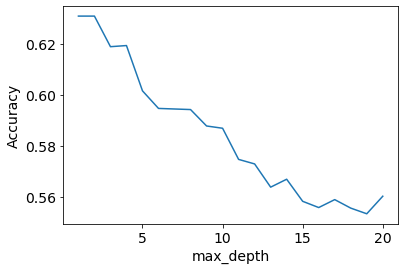

In [44]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [45]:
# show the best accuracy and the corresponding max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [46]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2, random_state = 1)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [47]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

Accuracy: 0.6453333333333333
F1-Score: 0.6448598130841121


Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logit = LogisticRegression(solver = 'liblinear', random_state = 1)
logit.fit(X_train, y_train)

logit_pred = logit.predict(X_test)

In [49]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, logit_pred))
print("F1-Score:", f1_score(y_test, logit_pred))

Accuracy: 0.6273333333333333
F1-Score: 0.6104529616724739


Teniendo en cuenta las el 'accuracy'y el 'F1-Score' el mejor modelo es el árbol de clasificación con valores iguales a 0.645 y 0.644 respectivamente.

# Exercise 7.7

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [50]:
# set a seed for reproducibility
np.random.seed(1)

n_samples = X_train.shape[0]
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a = n_samples, size = n_samples, replace = True) for _ in range(1, n_B + 1 )]
len(samples)

300

In [51]:
# Diciationary with three different types of models
models = {0: DecisionTreeClassifier(max_depth=None, random_state=1),
          1: DecisionTreeClassifier(max_depth=2, random_state=1),
          2: LogisticRegression(max_iter = 1000)}

# DataFrame for storing predicted price from each tree
y_pred = pd.DataFrame(index=y_test.index, columns=[list(range(n_B))])

In [52]:
import math
for i, sample in enumerate(samples):
    md = math.floor((i)/100)
    X = X_train.iloc[sample, 0:]
    y = y_train.iloc[sample]
    m = models[md].fit(X, y)
    y_pred[[i]] = m.predict(X_test)

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [53]:
# Se muestra la predicción de cada modelo
y_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,1,1,0,1,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1
2520,0,1,1,1,1,0,0,1,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,0,0,0,0,0,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3727,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 7.8

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [54]:
bag_pred = (y_pred.sum(axis = 1) >= (n_B / 2)).astype(np.int)

In [55]:
print("Accuracy:", accuracy_score(y_test, bag_pred))
print("F1-Score:", f1_score(y_test, bag_pred))

Accuracy: 0.6346666666666667
F1-Score: 0.6189151599443672


Al ensamblar los modelos mediante el uso de "majority voting"se encuentra que el accuracy del modelo es igual a 0.634 y el F1-Score de 0.624.

# Exercise 7.9

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [56]:
from sklearn.metrics import precision_recall_curve

y_prob = (y_pred.sum(axis = 1)/n_B)
prec, recall, threshold = precision_recall_curve(y_test, y_prob)

In [57]:
f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.13666666666666666
Mejor F1: 0.705028512182478


El threshold que maximiza el F1-Score es igual a 13.66%, dando como resultado un puntaje igual a 0.7079.

# Exercise 7.10

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [58]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [59]:
errors = np.zeros(n_B)

for i in range(n_B):
    md = math.floor((i)/100)
    y_pred_ = models[md].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

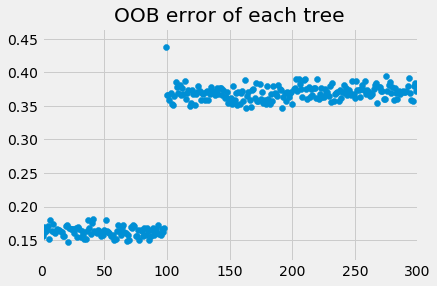

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_B), errors)
plt.xlim([0, n_B])
plt.title('OOB error of each tree')

In [61]:
alpha = (1 - errors) / (1 - errors).sum()

In [62]:
weighted_sum_1 = ((y_pred) * alpha).sum(axis=1)

In [63]:
weighted_sum_1.head(20)

1483    0.920133
2185    0.865576
2520    0.820278
3721    0.845574
3727    0.106866
4524    0.659876
234     0.057172
4735    0.147841
5839    0.308451
2939    0.789343
3053    0.844172
867     0.857074
276     0.860268
5798    0.087858
3512    0.932078
5789    0.076145
3198    0.826395
5908    0.920110
5718    0.227842
2687    0.070822
dtype: float64

In [64]:
y_pred_w = (weighted_sum_1 >= 0.5).astype(np.int)

In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred_w))
print("F1-Score:", f1_score(y_test, y_pred_w))

Accuracy: 0.638
F1-Score: 0.6231783483691882


Al ensamblar los modelos mediante el uso de "weigthed voting"se encuentra que el accuracy del modelo es igual a 0.635 y el F1-Score de 0.626. Esto, ent érminos generales, no implica una mejora con respecto a "mayority voting"en donde el accuracy del modelo es igual a 0.634 y el F1-Score de 0.624.

# Exercise 7.11

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [66]:
prec, recall, threshold = precision_recall_curve(y_test, weighted_sum_1)

f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.15654702396129055
Mejor F1: 0.703512396694215


El threshold que maximiza el F1-Score es igual a 16.35%, dando como resultado un puntaje igual a 0.7079.

# Exercise 7.12

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [67]:
est_feat = pd.DataFrame(index=X_train.index, columns=[list(range(n_B))])

for i, sample in enumerate(samples):
    md = math.floor((i)/100)
    X = X_train.iloc[sample, 0:]
    y = y_train.iloc[sample]
    m = models[md].fit(X, y)
    est_feat[[i]] = m.predict(X_train)

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\JCabal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [68]:
log = LogisticRegression()
log.fit(est_feat, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_stack = log.predict_proba(y_pred)[:,1]

In [70]:
prec, recall, threshold = precision_recall_curve(y_test, y_stack)

f1 = 2*(recall*prec)/(recall+prec)
print('Mejor Threshold:', threshold[np.argmax(f1)])
print('Mejor F1:', np.max(f1))

Mejor Threshold: 0.009621738129318243
Mejor F1: 0.7027027027027025


El threshold que maximiza el F1-Score es igual a 0.9%, dando como resultado un puntaje igual a 0.7049.